In [7]:
# Price optimization : use of analysis by a comapany to know how the customers react to the pices of their products or services. 
# what the pries should be to reach goal
# revenue goal
# data could be survey or previous sales

# stategies to prie products
# costs + pricing
# competition based pricing 
# percieved based value pricing(car)
# demand based pricing
# Price Elasticity of demand


# products have a property called price elastiity
# elasttic products whose purchase changed based on their prices
# inelastic proucts are not much affected my the prices luxery items and necessary items

In [8]:
# Price Elasticity of demand (PED) 

# to show the responsiveness or the elasticity of the quantity demanded of the product
# changes with the changes in the prices
# relationship between the price and demand and nothing else has changed.

# percentge change in quantity demanded when one percent change in price 
# e = %change in demand/ %change in price

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'ticks', color_codes = True)


In [10]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [11]:
transaction_data = pd.read_csv("Cafe_Transaction_Store.csv")
sell_data = pd.read_csv("Cafe_Sell_Meta_Data.csv")
data_info = pd.read_csv("Cafe_DateInfo.csv")

In [12]:
print(len(transaction_data))
print(len(sell_data))
print(len(data_info))

5404
11
1349


In [13]:
sell_data

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [14]:
sell_data.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


In [15]:
sell_data.describe(include = ['O'])

,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [16]:
sell_data[sell_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


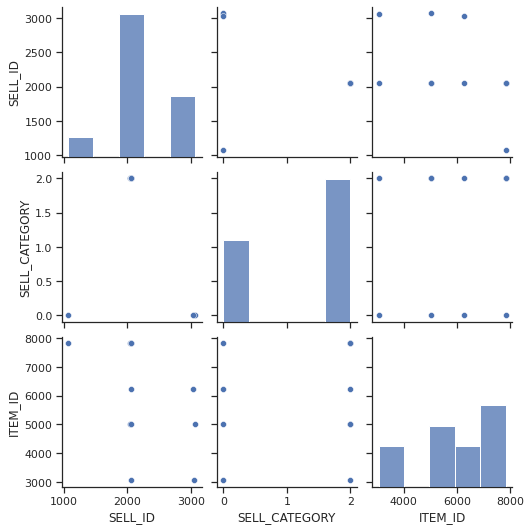

In [17]:
sns.pairplot(sell_data)

In [18]:
transaction_data.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [19]:
transaction_data.describe()

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


In [20]:
transaction_data.describe(include = ['O'])

,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [21]:
transaction_data[transaction_data.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

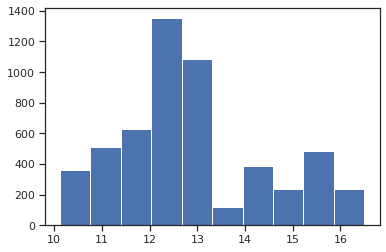

In [22]:
plt.hist(transaction_data.PRICE)
#bimodel graph

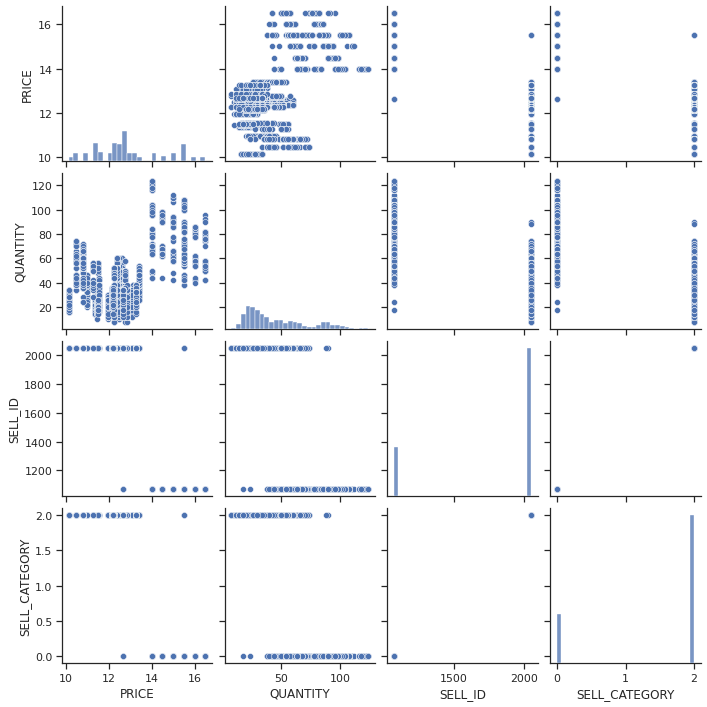

In [23]:
sns.pairplot(transaction_data)

In [24]:
data_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [25]:
data_info.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [26]:
data_info.dtypes


CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [27]:
data_info[data_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
...,...,...,...,...,...,...,...
1344,9/6/15,2015,NaN,1,0,75.2,1
1345,9/7/15,2015,NaN,0,0,77.0,1
1346,9/8/15,2015,NaN,0,0,73.4,1
1347,9/9/15,2015,NaN,0,0,71.6,1


In [28]:
data_info['HOLIDAY'] = data_info['HOLIDAY'].fillna("no holiday")

In [29]:
data_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,no holiday,0,0,32.0,1
4,1/5/12,2012,no holiday,0,0,24.8,0


In [30]:
data_info[data_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [31]:
(data_info.HOLIDAY == 'no holiday').sum()

1244

In [32]:
len(data_info)

1349

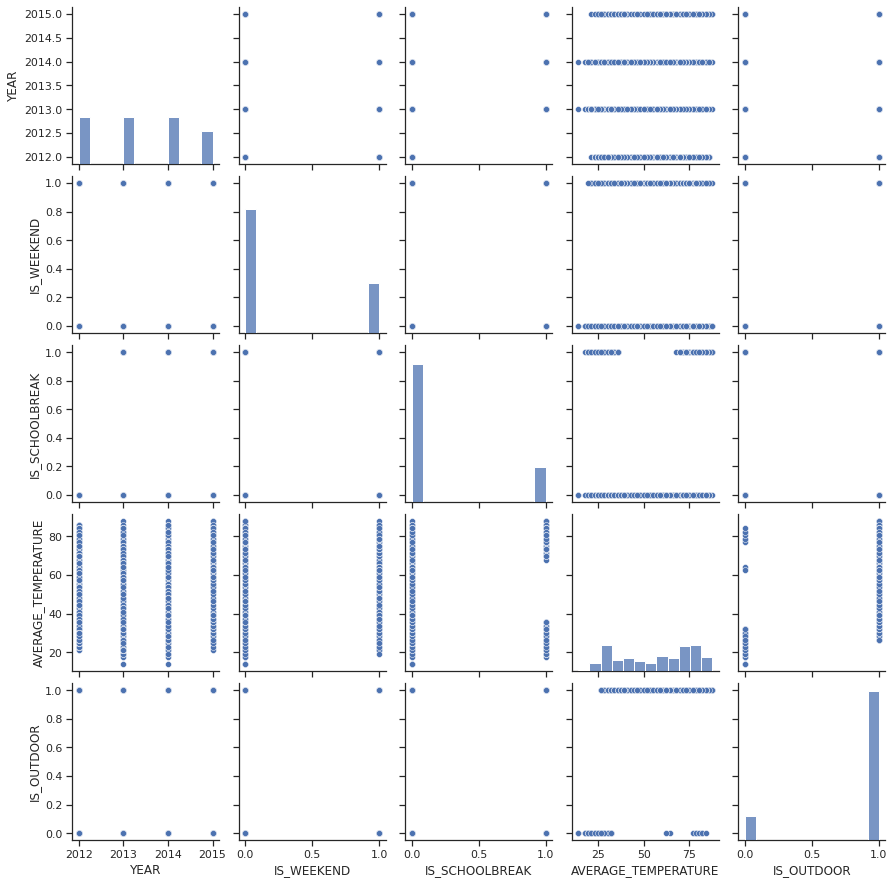

In [33]:
sns.pairplot(data_info)

In [34]:
data_info.HOLIDAY.unique() 


array(['New Year', 'no holiday', 'Luner New Year', 'Qing Ming Festival',
       'Labor Day', 'Dragon Boat Festivel', 'Mid-Autumn Day',
       'National Day', 'WWII Celebration'], dtype=object)

In [35]:
data_info.CALENDAR_DATE.min()

'1/1/12'

In [36]:
data_info.CALENDAR_DATE.max()

'9/9/15'

In [37]:
data_info.shape

(1349, 7)

# Exploring Data

In [38]:
dummy_data = pd.concat([sell_data['SELL_ID'], pd.get_dummies(sell_data['ITEM_NAME'])], axis = 1)
dummy_data

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [39]:
dummy_data.groupby(sell_data['SELL_ID']).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [40]:
data1 = pd.merge(sell_data, transaction_data.drop(['SELL_CATEGORY'], axis = 1), on = 'SELL_ID')

In [41]:
data1.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,7821,BURGER,01/01/12,15.5,46
1,1070,0,7821,BURGER,01/02/12,15.5,70
2,1070,0,7821,BURGER,01/03/12,15.5,62
3,1070,0,7821,BURGER,01/04/12,15.5,88
4,1070,0,7821,BURGER,01/05/12,15.5,104


In [42]:
data2 = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

In [43]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [44]:
data2.head()

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.5     46
                                   01/01/13       15.5     60
                                   01/01/14       15.5     72
                                   01/01/15       14.0     66
                                   01/02/12       15.5     70
Name: QUANTITY, dtype: int64

In [45]:
intermediate_data = data2.reset_index()
intermediate_data.head(10)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70
5,1070,0,BURGER,01/02/13,15.5,68
6,1070,0,BURGER,01/02/14,15.5,76
7,1070,0,BURGER,01/02/15,14.0,102
8,1070,0,BURGER,01/03/12,15.5,62
9,1070,0,BURGER,01/03/13,15.5,70


In [46]:
data1.shape

(10808, 7)

In [47]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [48]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [49]:
intermediate_data.shape

(10792, 6)

In [50]:
transaction_data['CALENDAR_DATE'].max()

'9/30/14'

In [51]:
combined_data = pd.merge(intermediate_data, data_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,no holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,no holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,no holiday,0,0,26.6,0


In [52]:
np.unique(combined_data['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'no holiday'], dtype=object)

In [53]:
np.unique(combined_data['IS_WEEKEND'])

array([0, 1])

In [54]:
np.unique(combined_data['IS_SCHOOLBREAK'])

array([0, 1])

In [55]:
#normal_day_data data of the normal week day
normal_day_data = combined_data[(combined_data['HOLIDAY']=='no holiday') & 
                                (combined_data['IS_SCHOOLBREAK']==0) & 
                                (combined_data['IS_WEEKEND']==0)]

In [56]:
normal_day_data.shape

(3768, 12)

In [57]:
normal_day_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,no holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,no holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,no holiday,0,0,26.6,0


In [58]:
np.unique(normal_day_data['HOLIDAY'])
np.unique(normal_day_data['IS_WEEKEND'])
np.unique(normal_day_data['IS_SCHOOLBREAK'])

array(['no holiday'], dtype=object)

array([0])

array([0])

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

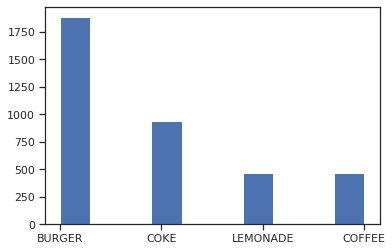

In [59]:
plt.hist(normal_day_data['ITEM_NAME'])

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

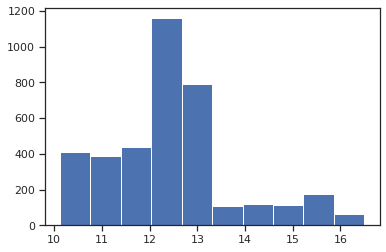

In [60]:
plt.hist(normal_day_data['PRICE'])

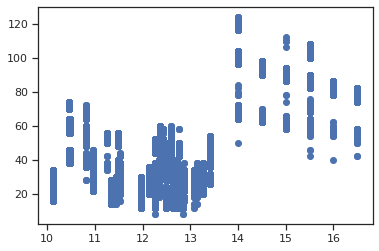

In [61]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

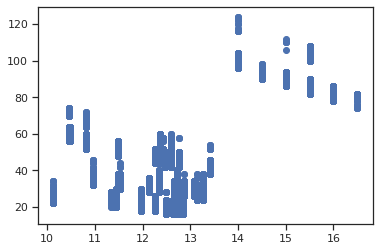

In [62]:
plt.scatter(normal_day_data['PRICE'], normal_day_data['QUANTITY'])

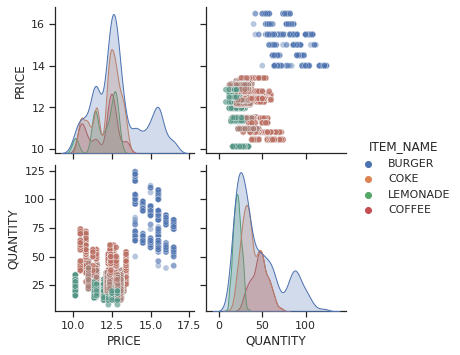

In [63]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.4})

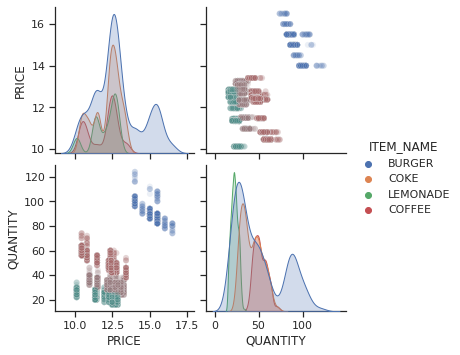

In [64]:
sns.pairplot(normal_day_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

In [65]:
combined_burger_data = combined_data[combined_data['ITEM_NAME'] == 'BURGER']

In [66]:
combined_burger_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,no holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,no holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,no holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.50,70,2013,no holiday,1,0,30.2,0


In [67]:
combined_burger_data.shape

(3348, 12)

In [68]:
combined_burger_data.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


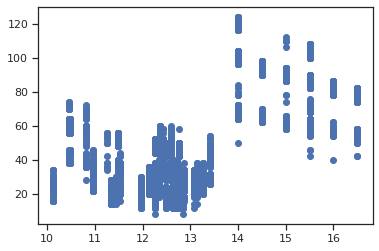

In [69]:
plt.scatter(combined_burger_data['PRICE'], combined_burger_data['QUANTITY'])

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

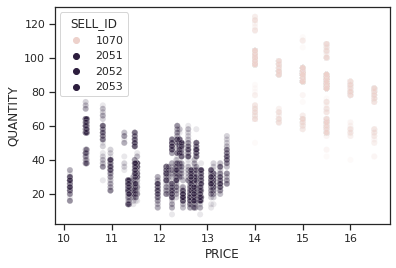

In [70]:
sns.scatterplot(data = combined_burger_data, x = combined_burger_data.PRICE, y = combined_burger_data.QUANTITY,  hue = 'SELL_ID', legend='full', alpha = 0.1)

In [71]:
np.unique(combined_data['SELL_ID'])

array([1070, 2051, 2052, 2053])

In [72]:
combined_burger_data_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & 
                                 (combined_data['SELL_ID'] == 1070)]

In [73]:
combined_burger_data_1070.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,no holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.5,70,2013,no holiday,1,0,30.2,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,no holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,no holiday,0,0,28.4,0
32,1070,0,BURGER,1/14/12,15.5,74,2012,no holiday,1,0,23.0,0


In [74]:
combined_burger_data_1070.shape

(837, 12)

In [75]:
combined_burger_data_1070.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

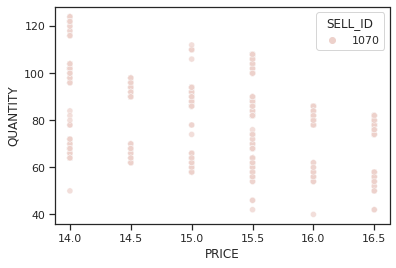

In [76]:
sns.scatterplot(data = combined_burger_data_1070, x = combined_burger_data_1070.PRICE, y = combined_burger_data_1070.QUANTITY,  hue = 'SELL_ID', legend='full', alpha = 0.7)

In [77]:
normal_burger_data = normal_day_data[normal_day_data['ITEM_NAME'] == 'BURGER']

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.0,1884.0,1884.000000,1884.000000
mean,1806.500000,1.500000,12.830340,49.562633,2013.186837,0.0,0.0,53.691720,0.883227
std,425.331956,0.866255,1.567257,27.309516,1.058620,0.0,0.0,18.721922,0.321235
min,1070.000000,0.000000,10.120000,16.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,28.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,40.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,2052.250000,2.000000,13.557500,74.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


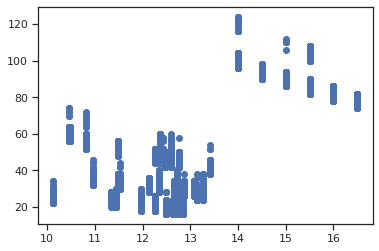

In [78]:
normal_burger_data.describe()
plt.scatter(normal_burger_data['PRICE'], normal_burger_data['QUANTITY'])

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

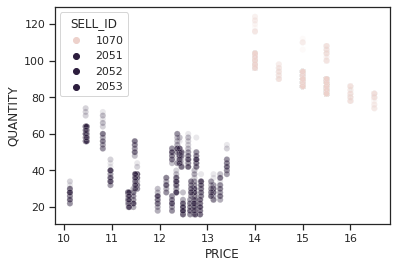

In [79]:
sns.scatterplot(data = normal_burger_data, x = normal_burger_data.PRICE, y = normal_burger_data.QUANTITY,  hue = 'SELL_ID', legend='full', alpha = 0.1)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,no holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,no holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,no holiday,0,0,28.4,0
48,1070,0,BURGER,1/14/14,15.5,86,2014,no holiday,0,0,28.4,1
56,1070,0,BURGER,1/14/15,14.0,122,2015,no holiday,0,0,30.2,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

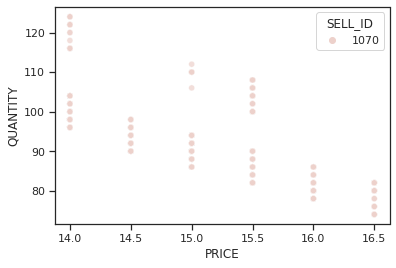

In [80]:
normal_burger_data_1070 = normal_day_data[(normal_day_data['ITEM_NAME'] == 'BURGER') & 
                                 (normal_day_data['SELL_ID'] == 1070)]
normal_burger_data_1070.head()
combined_burger_data_1070.describe()
sns.scatterplot(data = normal_burger_data_1070, x = normal_burger_data_1070.PRICE, y = normal_burger_data_1070.QUANTITY,  hue = 'SELL_ID', legend='full', alpha = 0.7)

# Model

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [82]:
burger_model = ols("QUANTITY ~ PRICE", data=combined_burger_data_1070).fit()
print(burger_model.summary())


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           1.45e-32
Time:                        15:22:52   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

eval_env: 1
eval_env: 1


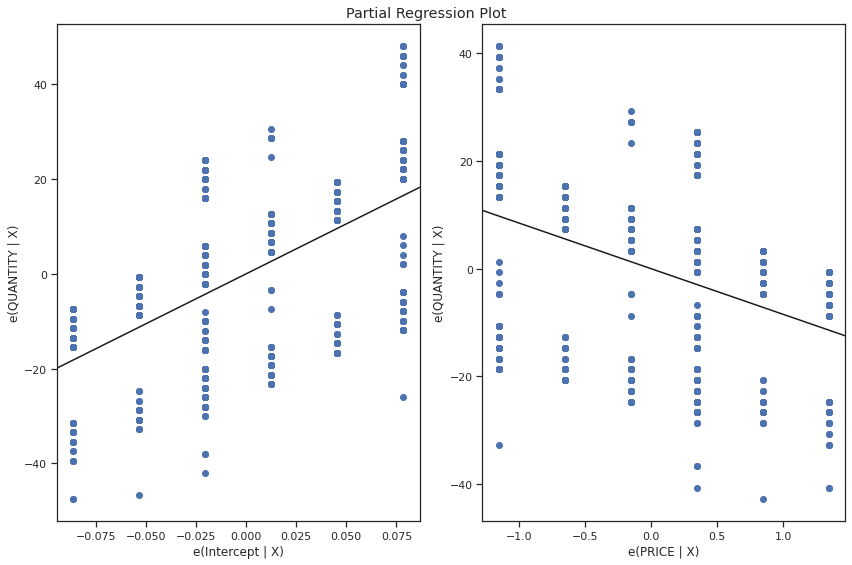

In [83]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           7.16e-70
Time:                        15:22:53   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

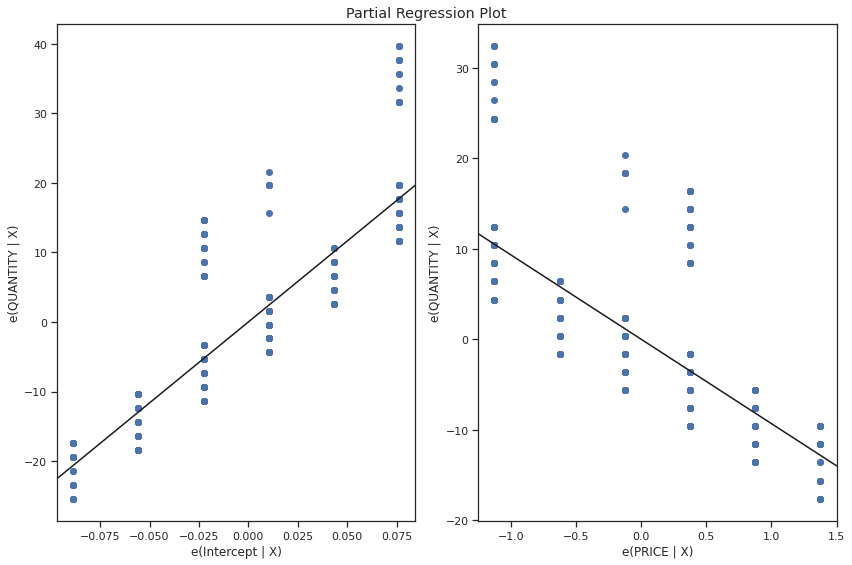

In [84]:
burger_model = ols("QUANTITY ~ PRICE", data=normal_burger_data_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

In [85]:
normal_day_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,no holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,no holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,no holiday,0,0,26.6,0


In [86]:
normal_day_data2 = combined_data[(combined_data['HOLIDAY']=='no holiday') & 
                          (combined_data['IS_SCHOOLBREAK']==0) & 
                          (combined_data['IS_WEEKEND']==0) & 
                          (combined_data['IS_OUTDOOR']==1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.5,86,2014,no holiday,0,0,28.4,1
88,1070,0,BURGER,1/15/15,14.0,104,2015,no holiday,0,0,32.0,1
120,1070,0,BURGER,1/16/15,14.0,100,2015,no holiday,0,0,32.0,1
448,1070,0,BURGER,1/27/12,15.5,86,2012,no holiday,0,0,32.0,1
576,1070,0,BURGER,1/31/12,15.5,84,2012,no holiday,0,0,32.0,1


(416, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

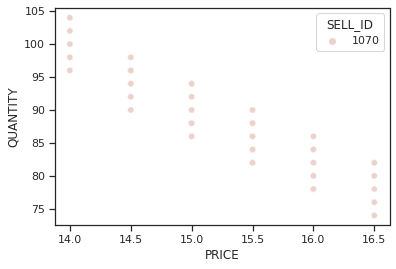

In [87]:
normal_burger_data2_1070 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == 'BURGER') & 
                                 (normal_day_data2['SELL_ID'] == 1070)]
normal_burger_data2_1070.head()
normal_burger_data2_1070.shape
normal_burger_data2_1070.describe()
sns.scatterplot(data = normal_burger_data2_1070, x = normal_burger_data2_1070.PRICE, y = normal_burger_data2_1070.QUANTITY,  hue = 'SELL_ID', legend='full', alpha = 0.7)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          5.51e-153
Time:                        15:22:53   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

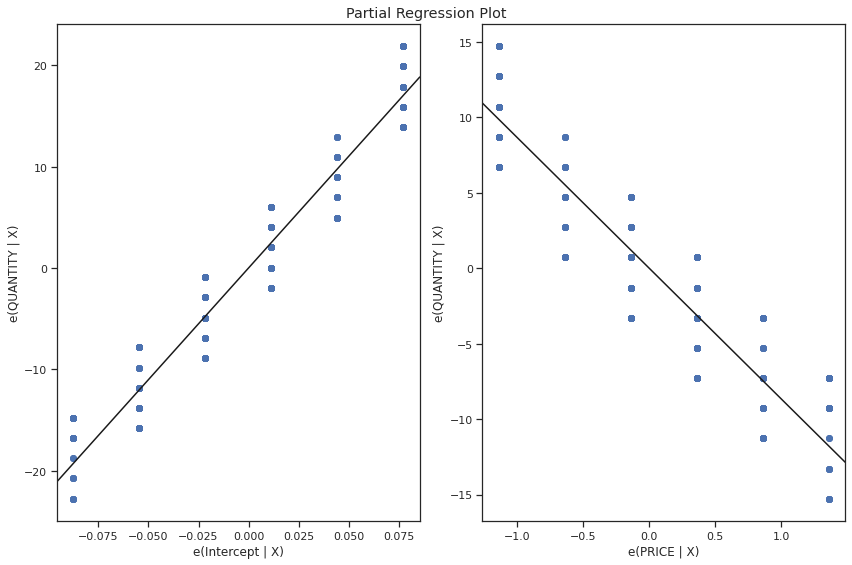

In [88]:
burger_model = ols("QUANTITY ~ PRICE", data=normal_burger_data2_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

eval_env: 1


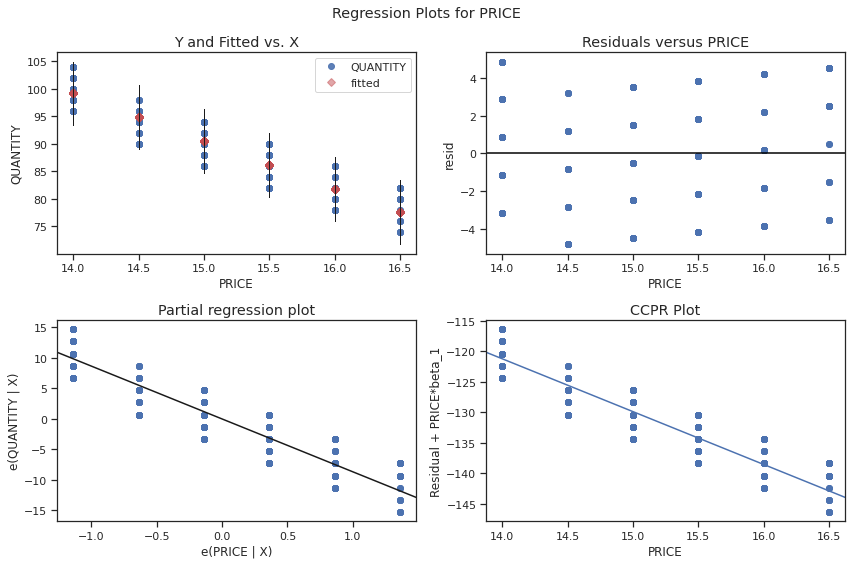

In [89]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,2051,2,BURGER,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,no holiday,1,0,30.2,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,no holiday,0,0,28.4,0
25,2051,2,BURGER,1/13/15,11.53,38,2015,no holiday,0,0,28.4,0
33,2051,2,BURGER,1/14/12,12.73,24,2012,no holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

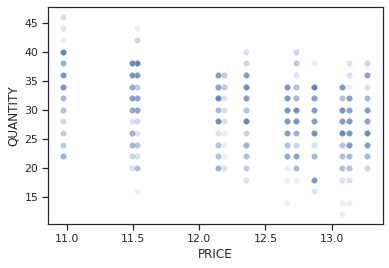

In [90]:
combined_burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]

combined_burger_2051.head()
combined_burger_2051.describe()
sns.scatterplot(data = combined_burger_2051, x = combined_burger_2051.PRICE, y = combined_burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           4.45e-27
Time:                        15:22:54   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

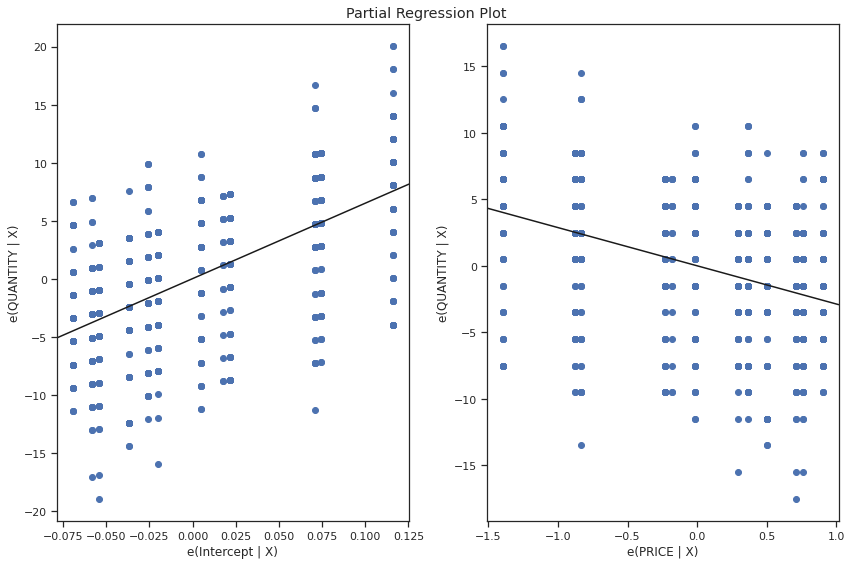

In [91]:
burger_model = ols("QUANTITY ~ PRICE", data=combined_burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,COKE,1/13/12,12.73,40,2012,no holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,no holiday,0,0,26.6,0
10,2051,2,COKE,1/13/13,13.13,26,2013,no holiday,1,0,30.2,0
15,2053,2,COKE,1/13/13,13.41,32,2013,no holiday,1,0,30.2,0
18,2051,2,COKE,1/13/14,13.27,38,2014,no holiday,0,0,28.4,0


(1674, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1674.000000,1674.0,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2052.000000,2.0,12.151326,38.150538,2013.351254,0.284349,0.200717,56.255914,0.878136
std,1.000299,0.0,0.871405,11.861375,1.062726,0.451239,0.400656,19.999336,0.327226
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,30.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.000000,2.0,12.770000,48.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

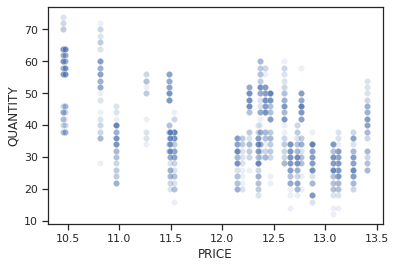

In [92]:
combined_coke_data = combined_data[combined_data['ITEM_NAME'] == 'COKE']
combined_coke_data.head()
combined_coke_data.shape
combined_coke_data.describe()
sns.scatterplot(x = combined_coke_data.PRICE, y = combined_coke_data.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          1.94e-104
Time:                        15:22:54   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

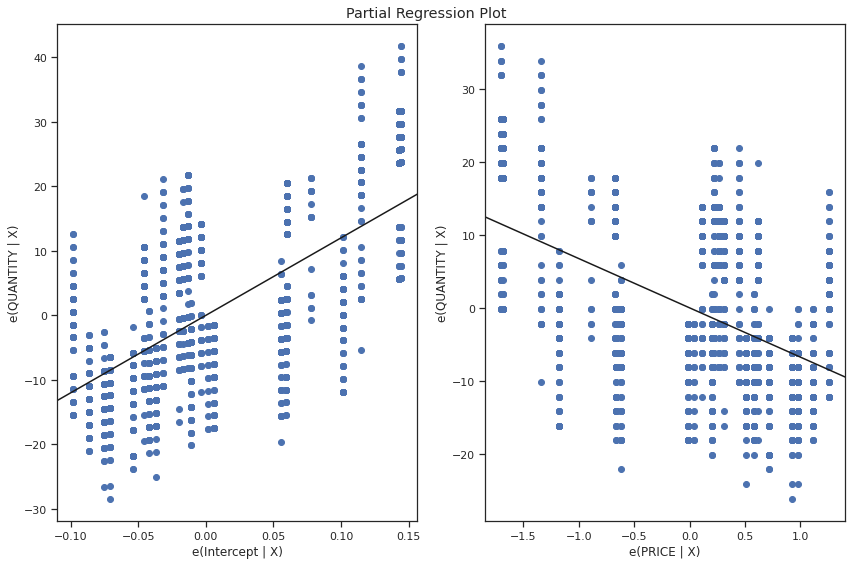

In [93]:
coke_model = ols("QUANTITY ~ PRICE", data=combined_coke_data).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,2053,2,COFFEE,1/13/12,12.60,58,2012,no holiday,0,0,26.6,0
14,2053,2,COFFEE,1/13/13,13.41,32,2013,no holiday,1,0,30.2,0
22,2053,2,COFFEE,1/13/14,12.37,60,2014,no holiday,0,0,28.4,0
30,2053,2,COFFEE,1/13/15,10.81,66,2015,no holiday,0,0,28.4,0
38,2053,2,COFFEE,1/14/12,12.60,42,2012,no holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2053.0,2.0,11.934636,46.802867,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.947643,9.909910,1.063043,0.451373,0.400776,20.005316,0.327324
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,40.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,48.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.0,2.0,12.600000,54.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

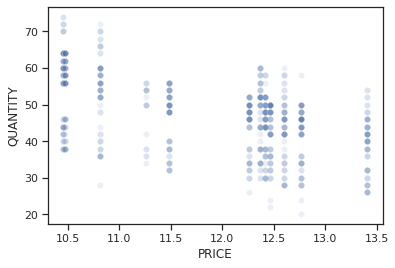

In [94]:
combined_coffee_data = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
combined_coffee_data.head()
combined_coffee_data.shape
combined_coffee_data.describe()
sns.scatterplot(x = combined_coffee_data.PRICE, y = combined_coffee_data.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           6.20e-62
Time:                        15:22:54   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

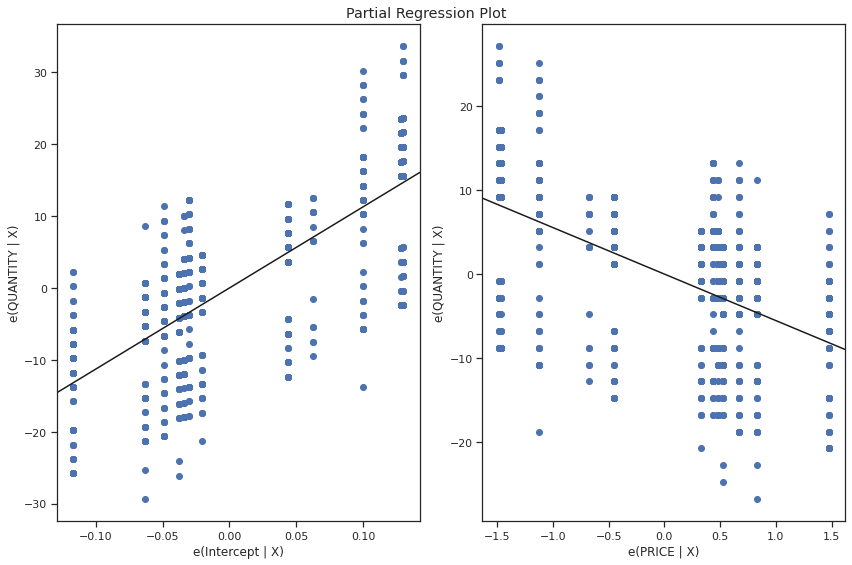

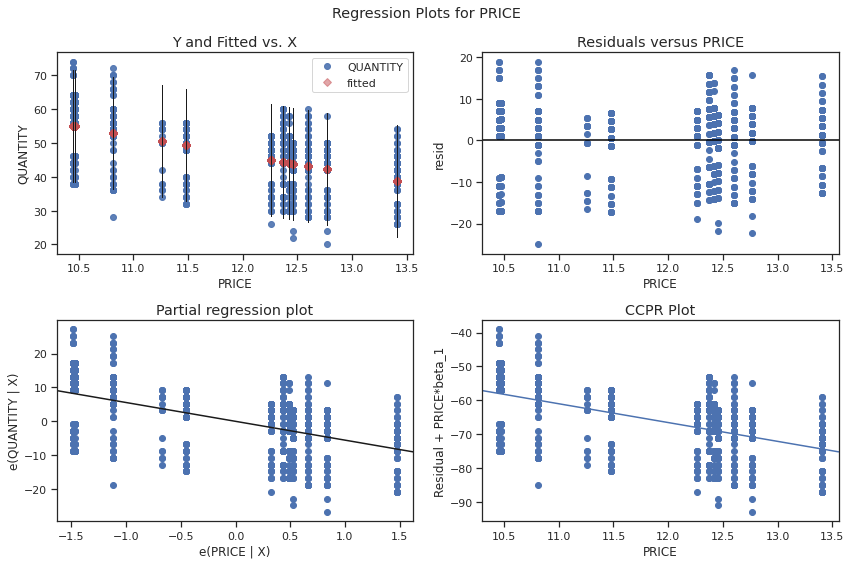

In [95]:
coffee_model = ols("QUANTITY ~ PRICE", data=combined_coffee_data).fit()
print(coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coffee_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coffee_model, 'PRICE', fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,no holiday,0,0,26.6,0
12,2052,2,LEMONADE,1/13/13,12.64,18,2013,no holiday,1,0,30.2,0
20,2052,2,LEMONADE,1/13/14,11.96,24,2014,no holiday,0,0,28.4,0
28,2052,2,LEMONADE,1/13/15,11.45,28,2015,no holiday,0,0,28.4,0
36,2052,2,LEMONADE,1/14/12,12.75,20,2012,no holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2052.0,2.0,11.976918,20.910394,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.820698,4.514501,1.063043,0.451373,0.400776,20.005316,0.327324
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,12.850000,34.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

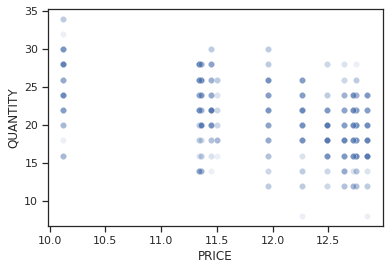

In [96]:
combined_lemonade_data = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
combined_lemonade_data.head()
combined_lemonade_data.shape
combined_lemonade_data.describe()
sns.scatterplot(x = combined_lemonade_data.PRICE, y = combined_lemonade_data.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           7.46e-46
Time:                        15:22:55   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

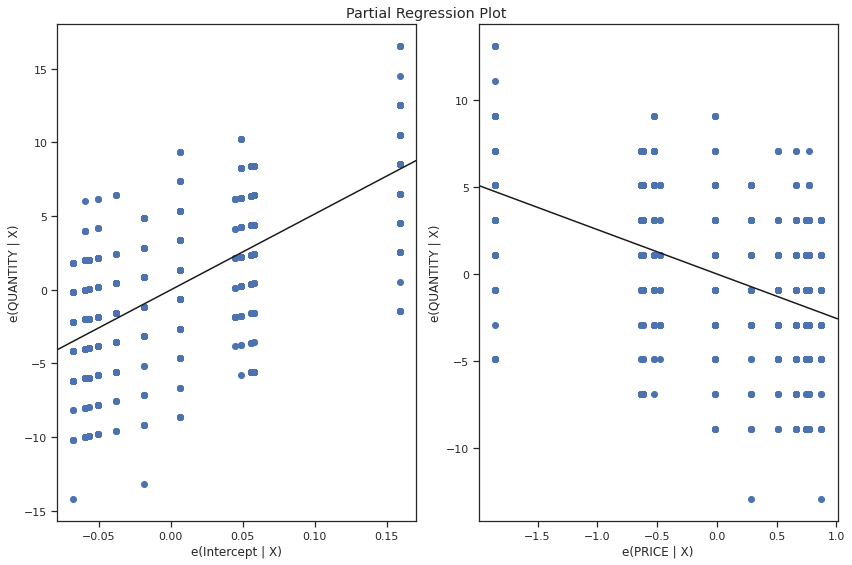

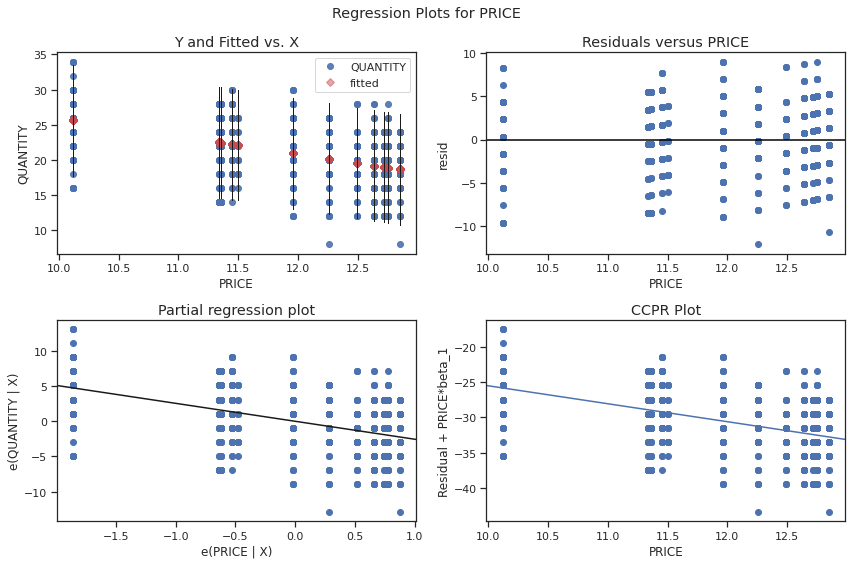

In [97]:
lemonade_model = ols("QUANTITY ~ PRICE", data=combined_lemonade_data).fit()
print(lemonade_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lemonade_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lemonade_model, 'PRICE', fig=fig)

In [98]:
elasticities = {}

In [99]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -8.658581488470567
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          5.51e-153
Time:                        15:22:56   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


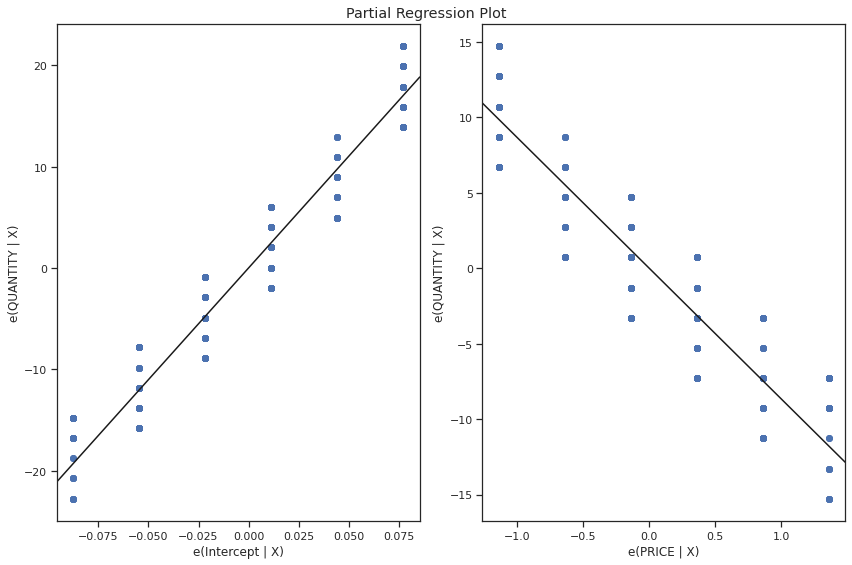

In [100]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(normal_burger_data2_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           1.34e-58
Time:                        15:22:56   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


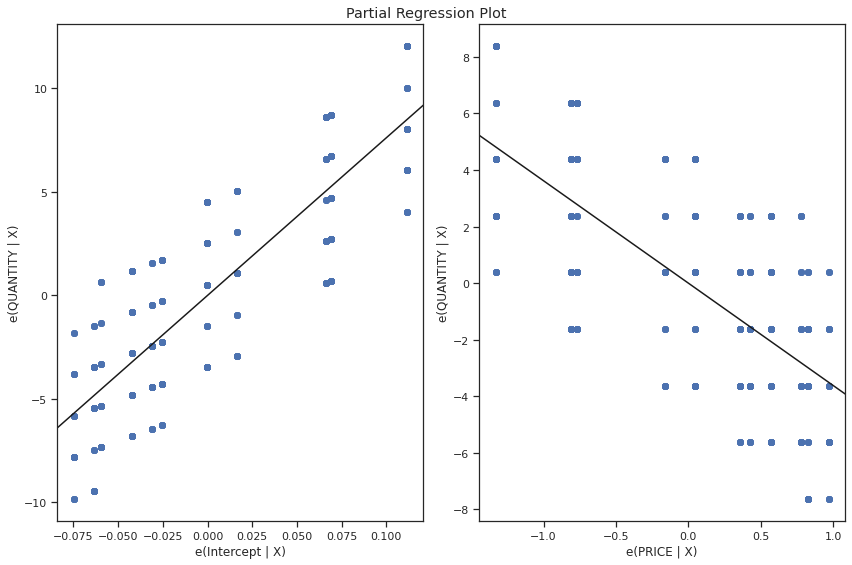

In [101]:
normal_burger_data2_2051 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "BURGER") & (normal_day_data2['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(normal_burger_data2_2051)

Price elasticity of the product: -2.8567029845599605
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           5.32e-53
Time:                        15:22:56   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

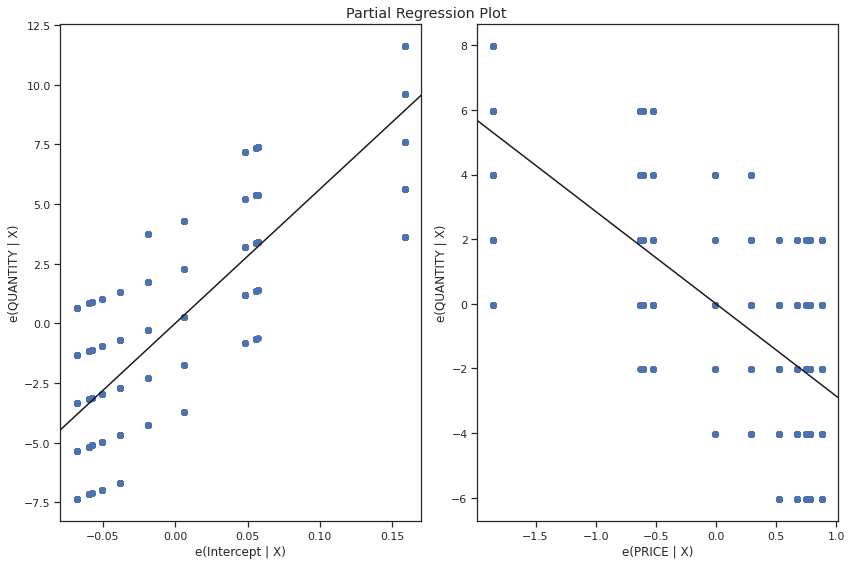

In [102]:
normal_burger_data2_2052 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "BURGER") & (normal_day_data2['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(normal_burger_data2_2052)

Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          3.72e-152
Time:                        15:22:57   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


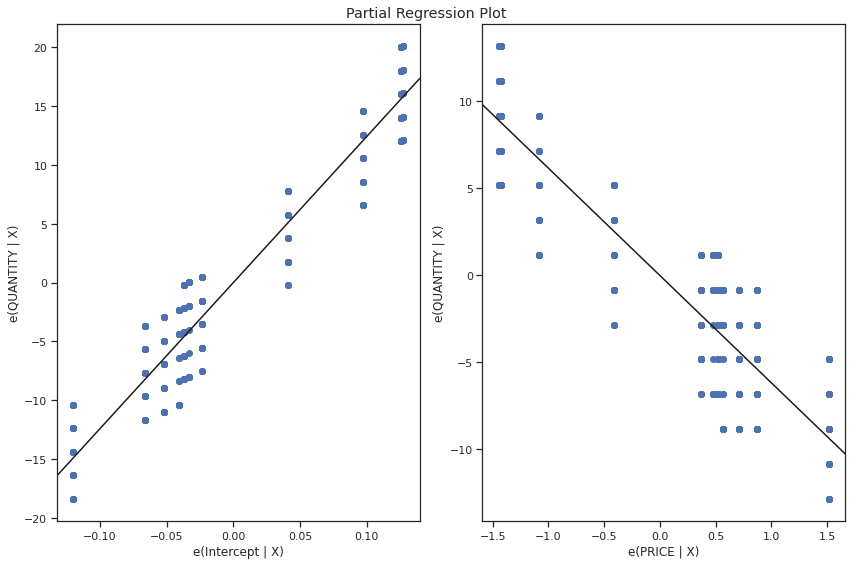

In [103]:
normal_burger_data2_2053 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "BURGER") & (normal_day_data2['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(normal_burger_data2_2053)

Price elasticity of the product: -7.460103485084992
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           2.00e-82
Time:                        15:22:57   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(-7.460103485084992,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f94f9103a00>)

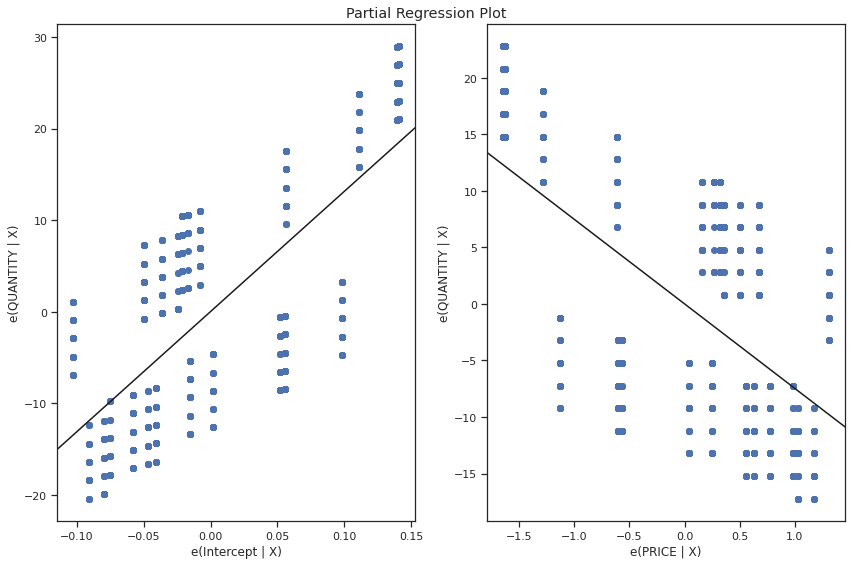

In [104]:
normal_coke_data2 = normal_day_data2[normal_day_data2['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(normal_coke_data2)

In [107]:
# normal_coke_data2_3067 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "COKE") & (normal_day_data2['SELL_ID'] == 3067)]
# elasticities['coke_3067'], model_coke_3067 = create_model_and_find_elasticity(normal_coke_data2_3067)

In [108]:
normal_coke_data2_3067

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          3.72e-152
Time:                        15:23:30   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


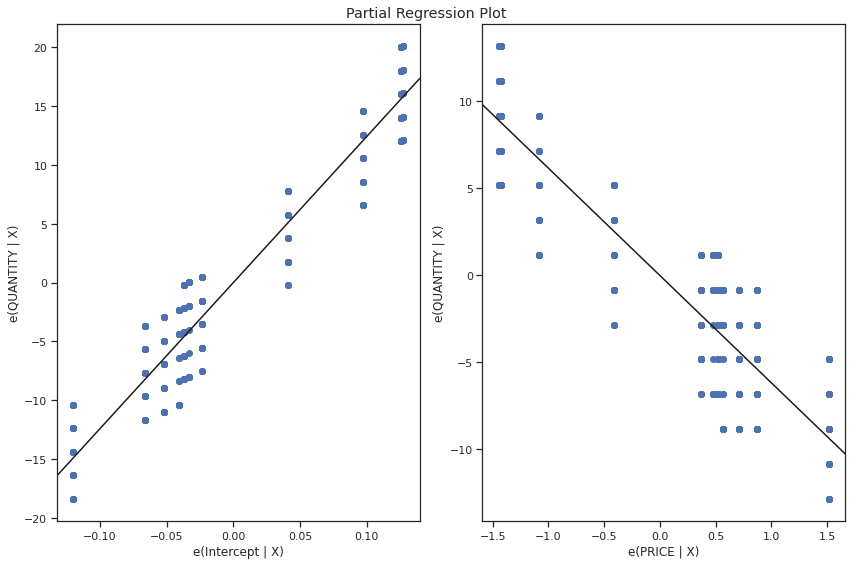

In [109]:
normal_coke_data2_2053 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "COKE") & (normal_day_data2['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(normal_coke_data2_2053)

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           1.34e-58
Time:                        15:23:30   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


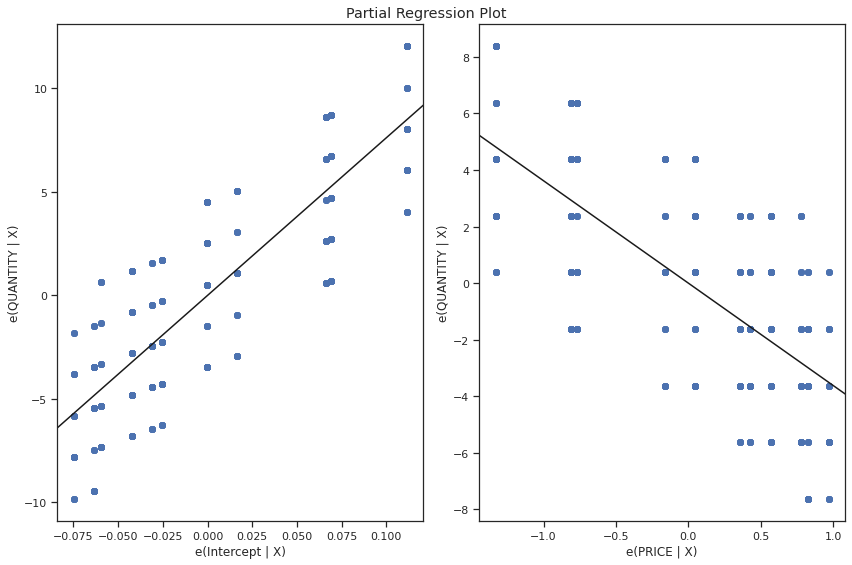

In [110]:
normal_coke_data2_2051 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "COKE") & (normal_day_data2['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(normal_coke_data2_2051)


Price elasticity of the product: -2.8567029845599605
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           5.32e-53
Time:                        15:23:30   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

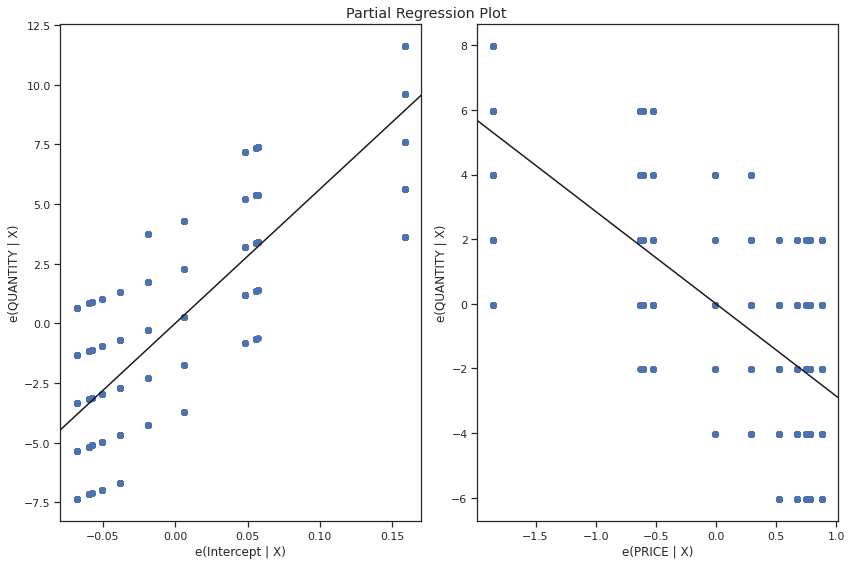

In [111]:
normal_lemonade_data2_2052 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "LEMONADE") & (normal_day_data2['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(normal_lemonade_data2_2052)

In [114]:
# normal_lemonade_data2_3028 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "LEMONADE") & (normal_day_data2['SELL_ID'] == 3028)]
# elasticities['lemonade_3028'], model_lemonade_3028 = create_model_and_find_elasticity(normal_lemonade_data2_3028)

In [115]:
normal_lemonade_data2_3028

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):          3.72e-152
Time:                        15:23:55   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


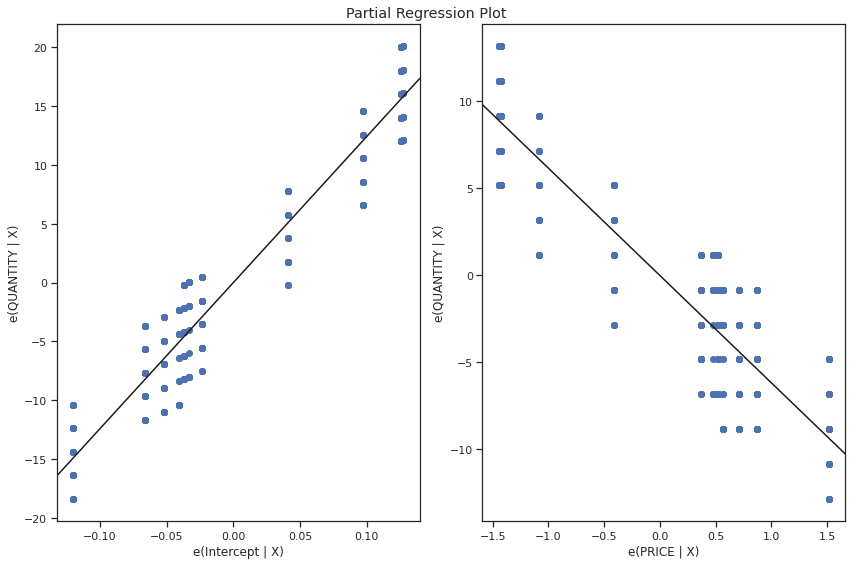

In [116]:
normal_coffee_data2_2053 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "COFFEE") & (normal_day_data2['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(normal_coffee_data2_2053)

In [118]:
# normal_coffee_data2_3055 = normal_day_data2[(normal_day_data2['ITEM_NAME'] == "COFFEE") & (normal_day_data2['SELL_ID'] == 3055)]
# elasticities['coffee_3055'], model_coffee_3055 = create_model_and_find_elasticity(normal_coffee_data2_3055)

In [120]:
# normal_coffee_data2_3055

In [121]:
elasticities

{'burger_1070': -8.658581488470567,
 'burger_2051': -3.618990615456309,
 'burger_2052': -2.8567029845599605,
 'burger_2053': -6.164156666230162,
 'coke_2053': -6.164156666230162,
 'coke_2051': -3.618990615456309,
 'lemonade_2052': -2.8567029845599605,
 'coffee_2053': -6.164156666230162}

# Price optimization

In [122]:
coke_data = normal_coke_data2_2053
coke_data.PRICE.min()


10.45

In [123]:
coke_data.PRICE.max()

13.41

In [124]:
#Let's 
cost = 9.0

In [125]:
test_data = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [126]:
test_data['PRICE'] = np.arange(9.5, 20,0.01)

In [127]:
test_data['QUANTITY'] = model_coke_2051.predict(test_data['PRICE'])

In [145]:
test_data.head()

,PRICE,QUANTITY,PROFIT
0,9.50,41.759021,20.879510
1,9.51,41.722831,21.278644
2,9.52,41.686641,21.677053
3,9.53,41.650451,22.074739
4,9.54,41.614261,22.471701


In [129]:
test_data['PROFIT'] = (test_data["PRICE"] - cost) * test_data["QUANTITY"]

In [146]:
test_data.head()

,PRICE,QUANTITY,PROFIT
0,9.50,41.759021,20.879510
1,9.51,41.722831,21.278644
2,9.52,41.686641,21.677053
3,9.53,41.650451,22.074739
4,9.54,41.614261,22.471701


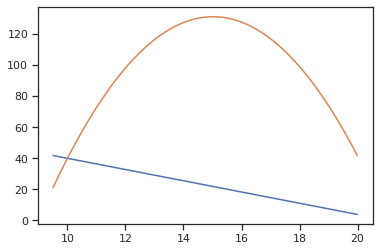

In [131]:
plt.plot(test_data['PRICE'],test_data['QUANTITY'])
plt.plot(test_data['PRICE'],test_data['PROFIT'])
plt.show()

In [132]:
index = np.where(test_data['PROFIT'] == test_data['PROFIT'].max())[0][0]

In [133]:
test_data.loc[index]

PRICE        15.020000
QUANTITY     21.782193
PROFIT      131.128799
Name: 552, dtype: float64

In [134]:
test_data.loc[[index]]

,PRICE,QUANTITY,PROFIT
552,15.02,21.782193,131.128799


In [135]:
def find_optimal_price(data, model, cost):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test_data = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

    test_data['PRICE'] = np.arange(start_price, end_price,0.01)
    test_data['QUANTITY'] = model.predict(test_data['PRICE'])
    test_data['PROFIT'] = (test_data["PRICE"] - cost) * test_data["QUANTITY"]
    plt.plot(test_data['PRICE'],test_data['QUANTITY'])
    plt.plot(test_data['PRICE'],test_data['PROFIT'])
    plt.show()
    ind = np.where(test_data['PROFIT'] == test_data['PROFIT'].max())[0][0]
    values_at_max_profit = test_data.iloc[[ind]]
    return values_at_max_profit
    

In [136]:
optimal_price = {}
cost = 9

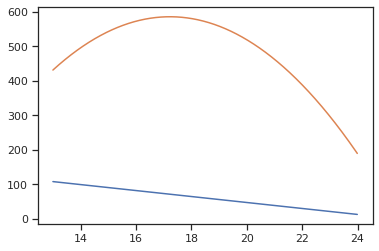

In [137]:
optimal_price['burger_1070'] = find_optimal_price(normal_burger_data2_1070, model_burger_1070, cost)

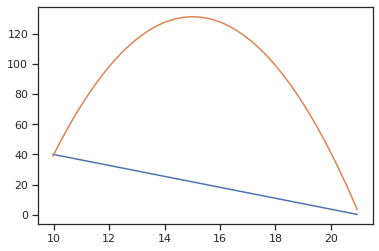

In [138]:
optimal_price['burger_2051'] = find_optimal_price(normal_burger_data2_2051, model_burger_2051, cost)

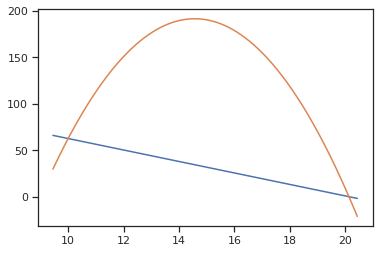

In [139]:
optimal_price['burger_2053'] = find_optimal_price(normal_burger_data2_2053, model_burger_2053, cost)

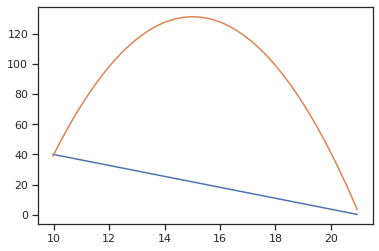

In [140]:
optimal_price['coke_2051'] = find_optimal_price(normal_coke_data2_2051, model_coke_2051, cost)

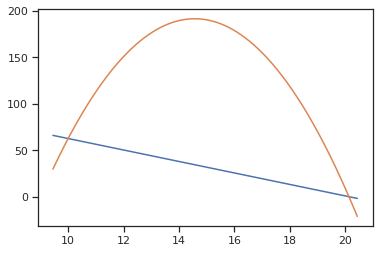

In [141]:
optimal_price['coke_2053'] = find_optimal_price(normal_coke_data2_2053, model_coke_2053, cost)

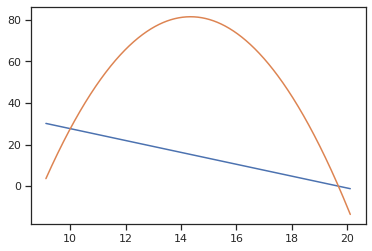

In [142]:
optimal_price['lemonade_2052'] = find_optimal_price(normal_lemonade_data2_2052, model_lemonade_2052, cost)

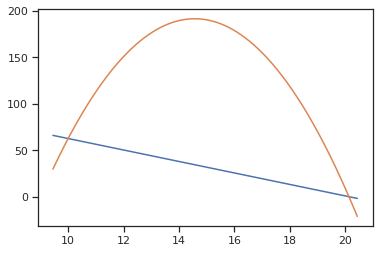

In [143]:
optimal_price['coffee_2053'] = find_optimal_price(normal_coffee_data2_2053, model_coffee_2053, cost)

In [148]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825}

These are the prices cafe should put on for the maximum profit. These are on the normal day, no holiday or weekend is considered here.